In [1]:
from scripts.ibge_utils import processar_dados_populacionais
from scripts.sidra_utils import processar_dados_empresas

# Passo 1: Carregar e processar dados populacionais
df_populacao_final = processar_dados_populacionais("data/populacao_idade.xlsx")

# Passo 2: Carregar e processar dados do SIDRA + unir com os dados populacionais
df_completo = processar_dados_empresas("data/dados_empresas_ativas_grande_regiao_2007_2022.csv", df_populacao_final)
df_completo.to_csv("data/df_completo.csv", index=False)
print(df_completo.head())

 Arquivo carregado com sucesso.
Colunas detectadas: ['IDADE', 'SEXO', 'CÓD.', 'SIGLA', 'LOCAL', 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070]
Faixas etarias encontradas na tabela:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90]

 Registros filtrados nessa faixa: 2079

 Anos encontrados: [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,

c:\Users\Gi\Downloads\case_imobiliario\scripts\sidra_utils.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Empresas_Ativas'] = pd.to_numeric(df_filtrado['Empresas_Ativas'].replace('-', '0').str.replace('.', '', regex=False), errors='coerce').fillna(0).astype(int)


Arquivo df_completo.csv carregado com sucesso.
Colunas detectadas: ['UF', 'ANO', 'Faixa_Pessoal', 'Empresas_Ativas', 'Populacao_38_58', 'Razao']
Nordeste: R² = 0.51
Previsões para Nordeste em [2021, 2022]: {2021: 1306.9545344164653, 2022: 1226.3947162337427}


c:\Users\Gi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Gi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


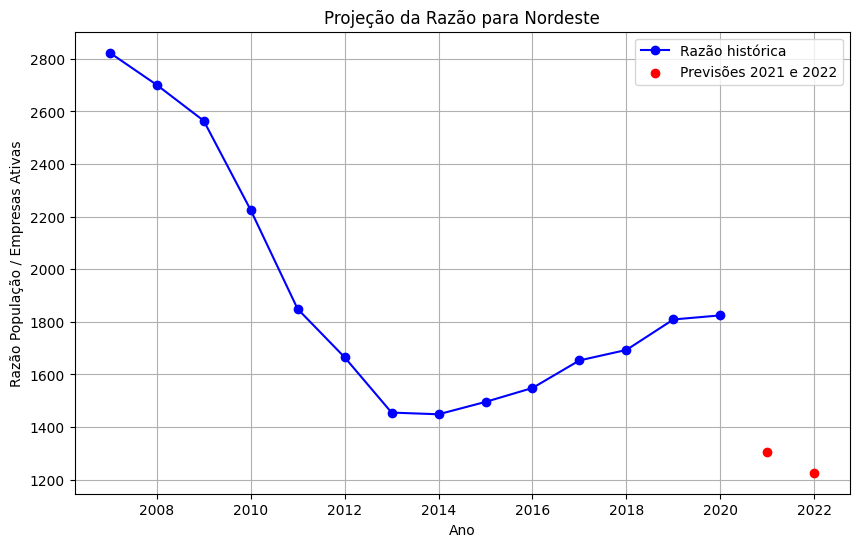

Previsões para 2021 e 2022: {2021: 1306.9545344164653, 2022: 1226.3947162337427}
Coeficiente de determinação (R²): 0.5085486117665905


In [5]:
import pandas as pd
from scripts.analise_temporal import analise_temporal
arquivo_completo = 'data/df_completo.csv' 
# rodando a analise 
previsoes, r2 = analise_temporal(arquivo_completo, regiao='Nordeste', anos_futuros=[2021, 2022])
print(f"Previsões para 2021 e 2022: {previsoes}")
print(f"Coeficiente de determinação (R²): {r2}")

Com base nos dados históricos de 2007 a 2020, o modelo fez uma projeção da razão entre a população de 38 a 58 anos e o número de empresas ativas no Nordeste.

As previsões para os próximos anos ficaram assim:

    * Para 2021: a razão estimada foi de 1.306,95, ou seja, cerca de 1.307 pessoas nessa faixa etária para cada empresa ativa
    * Para 2022: essa razão caiu para 1.226,39, mostrando uma tendência de leve queda
Isso pode indicar que o número de empresas está crescendo mais rápido que a população nessa faixa etária, o que pode ser um sinal positivo em termos de desenvolvimento econômico.
O modelo usado teve um coeficiente de determinação (R²) de 0,51, o que significa que ele conseguiu explicar cerca de 51% do comportamento dos dados ao longo do tempo

Previsões com média móvel (3 anos) para Sudeste: {2021: 791.2378081090152, 2022: 791.2378081090152}


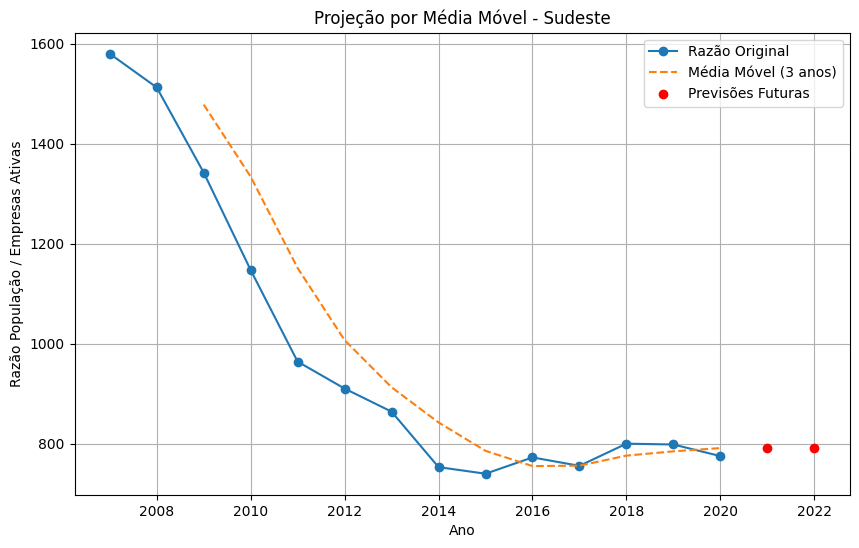

In [ ]:
from scripts.analise import analise_temporal_media_movel
df_completo = pd.read_csv('data/df_completo.csv')
previsoes = analise_temporal_media_movel(df_completo, regiao='Sudeste', janela=3, anos_futuros=[2021, 2022])

Na região Sudeste, aplicamos a média móvel de 3 anos para projetar a razão entre população (38 a 58 anos) e empresas ativas. O resultado foi estável, com previsões de 791,24 para 2021 e 2022, indicando que não há grandes variações esperadas no curto prazo.

## Grupamento Temporal

In [2]:
import pandas as pd
from scripts.agrupamento_temporal import agrupamento_temporal
df_completo = pd.read_csv('data/df_completo.csv')
df_resultados = agrupamento_temporal(df_completo)
print(df_resultados)

         Regiao        Status
0  Centro-Oeste        Neutro
1      Nordeste        Neutro
2         Norte        Neutro
3       Sudeste  Oportunidade
4           Sul  Oportunidade


c:\Users\Gi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Gi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Gi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Gi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Gi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarn

Tendência média por cluster:
Cluster
0    127.065212
1      1.635293
2     20.864878
Name: Tendencia_2015_2020, dtype: float64
Cluster 0: Norte, Nordeste
Cluster 1: Sul
Cluster 2: Sudeste, Centro-Oeste


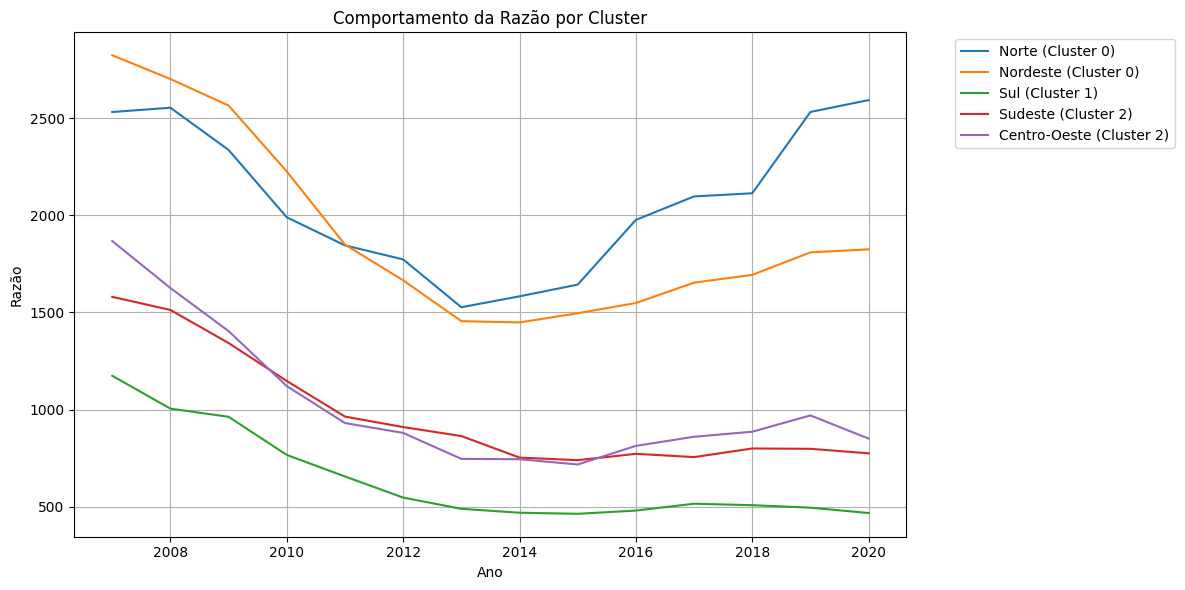

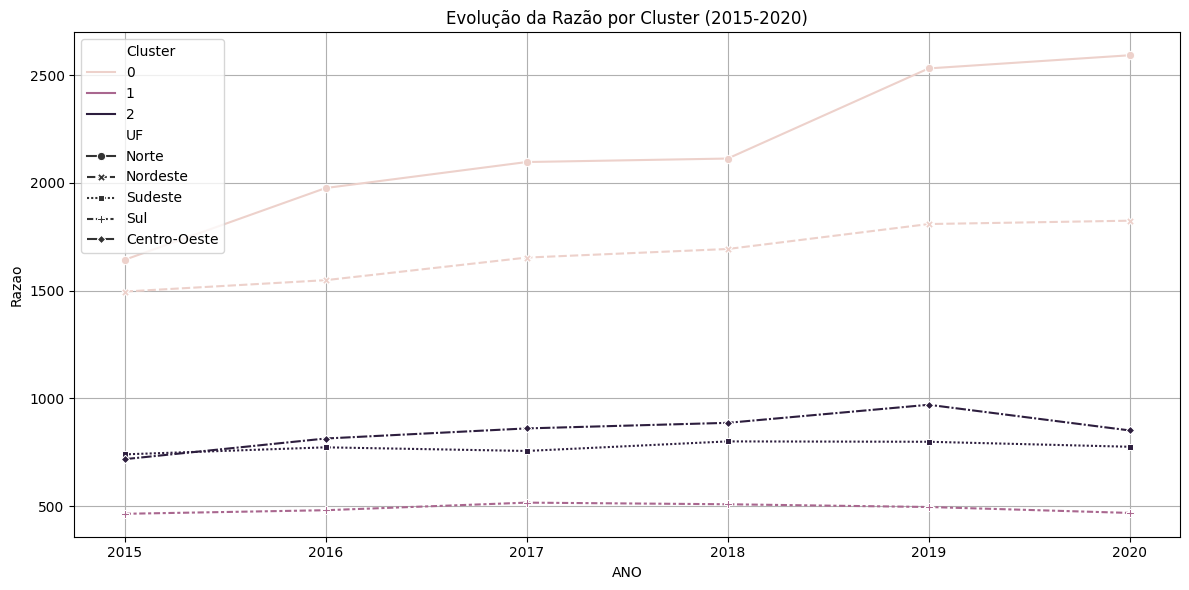

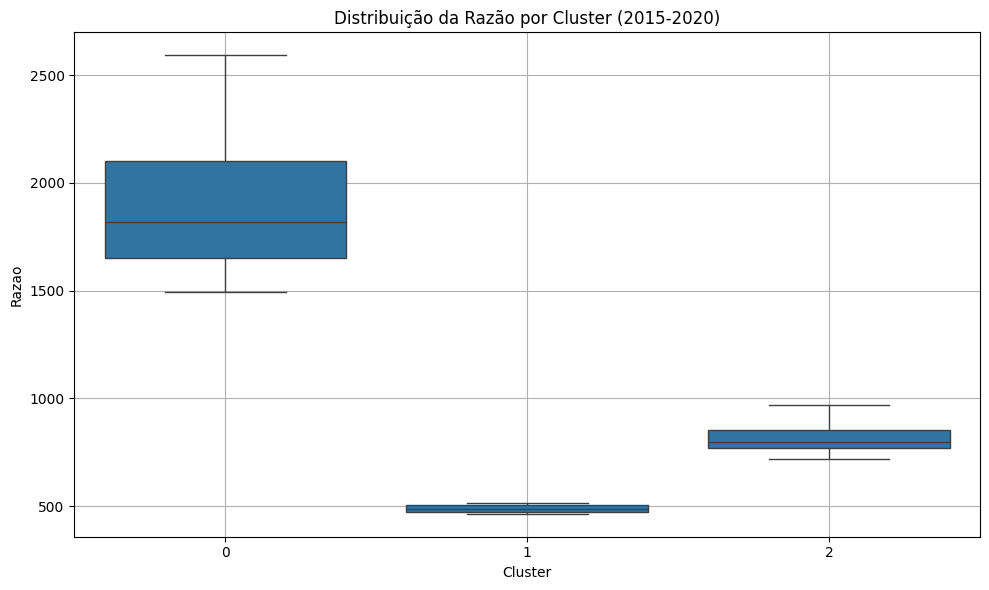

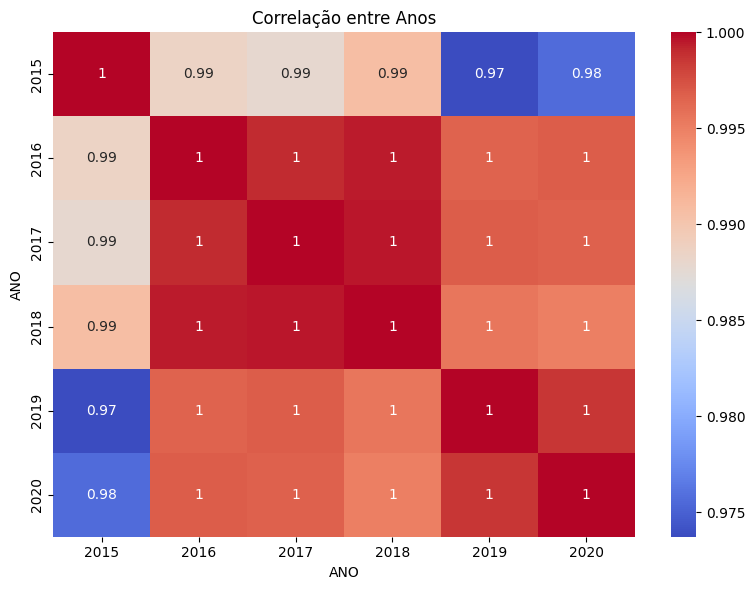

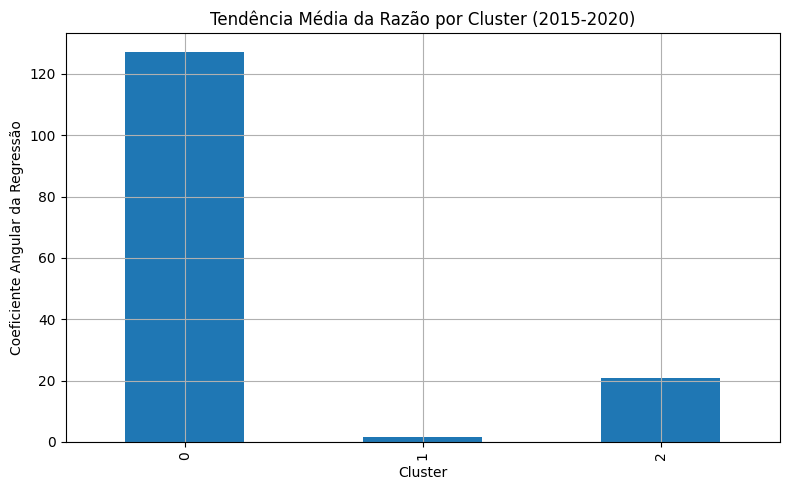

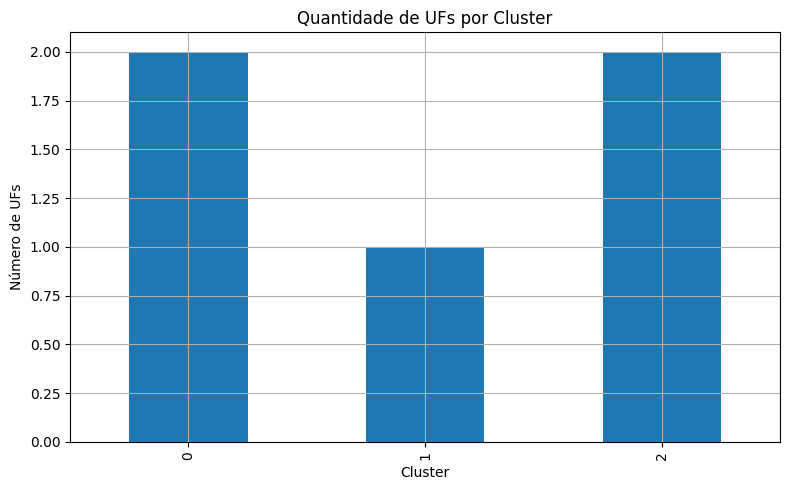

ImportError: cannot import name 'gerar_graficos_e_clusters' from 'scripts.graficos_e_cluster' (c:\Users\Gi\Downloads\case_imobiliario\scripts\graficos_e_cluster.py)

In [ ]:
import pandas as pd
from scripts.graficos_e_cluster import gerar_graficos_e_clusters
df_completo = pd.read_csv('data/df_completo.csv')
df_pivot = pd.read_csv('data/df_pivot.csv')  
gerar_graficos_e_clusters(df_completo, df_pivot)

Grafico 1 - Enquanto o Norte e Nordeste crescem rapidamente, o Sul se mantém estável, e o Sudeste/Centro-Oeste avança de forma moderada. Essas diferenças podem ser causadas por fatores como políticas públicas, investimentos ou características próprias de cada região


Grafico 3- Os anos apresentam altíssima correlação (entre 0.97 e 1.00). O ano de 2015 mostra leve diferença, mas ainda mantém forte relação com os demais.

c:\Users\Gi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Gi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Gi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Gi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Gi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarn

ANO           Cluster  Tendencia_2007_2020
UF                                        
Centro-Oeste        2           -61.498849
Nordeste            0           -80.559818
Norte               0            -0.820506
Sudeste             2           -60.499187
Sul                 1           -47.871042
Cluster 0: Norte, Nordeste
Cluster 1: Sul
Cluster 2: Sudeste, Centro-Oeste


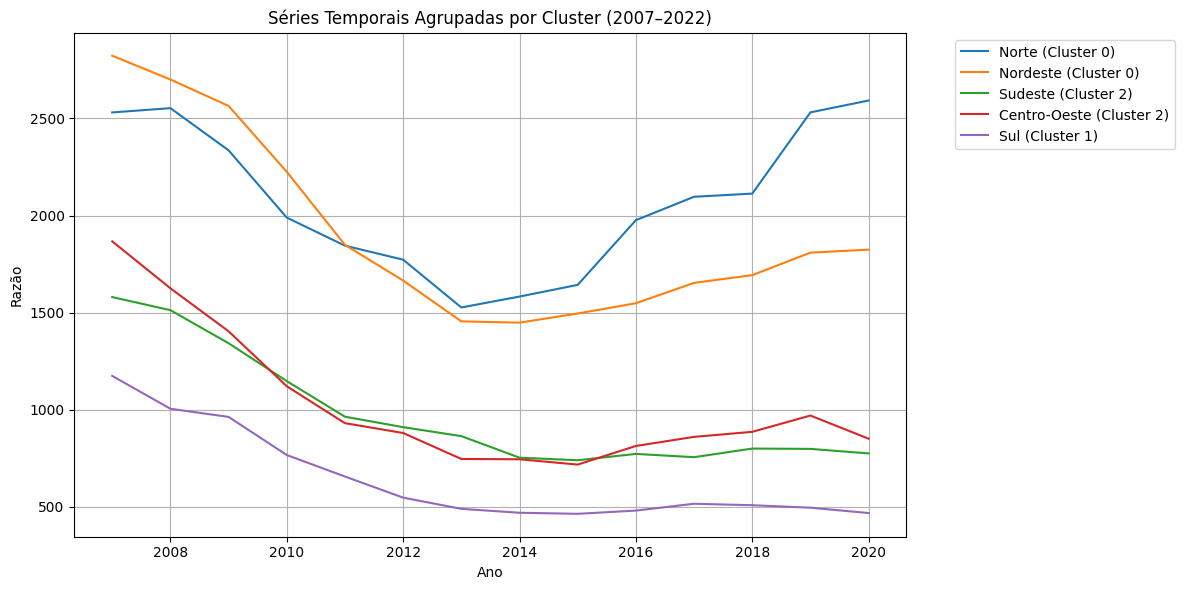

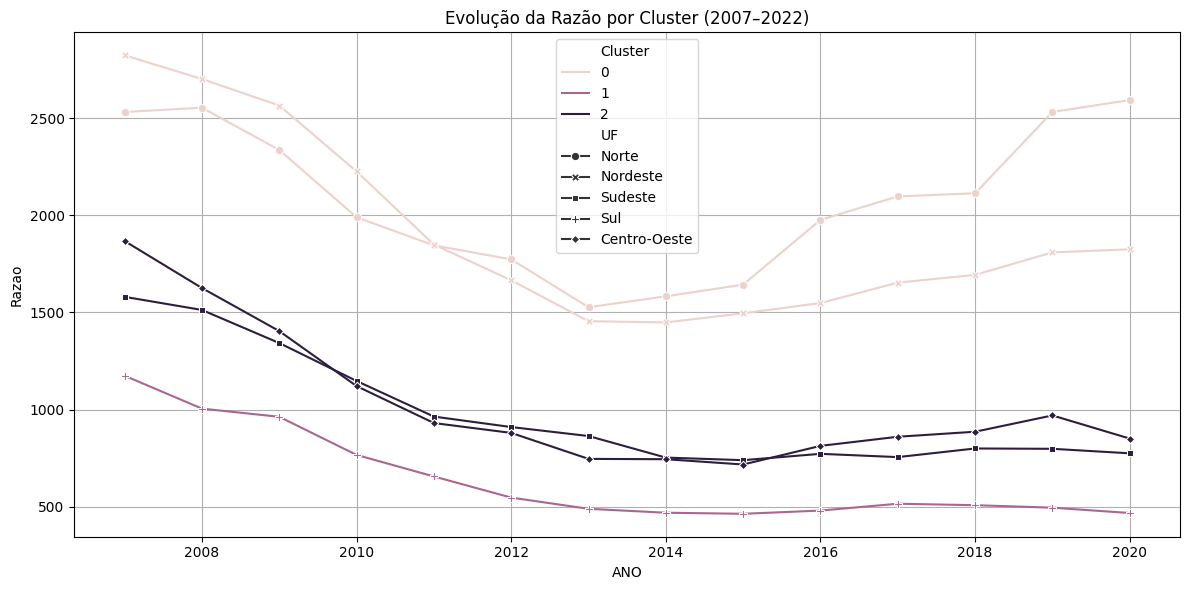

ANO,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Cluster,Tendencia_2007_2020
UF,,,,,,,,,,,,,,,,,,
Centro-Oeste,1867.261820,1625.454455,1404.028322,1121.076948,930.952629,880.207416,746.527676,744.879333,717.656943,813.501534,860.389325,886.265631,970.107902,850.959395,568.706440,507.207590,2,-61.498849
Nordeste,2823.128595,2700.893115,2564.516618,2225.265356,1849.012738,1665.358962,1455.043047,1448.558406,1495.658705,1548.524365,1653.368296,1693.200977,1809.035765,1824.579445,1306.954534,1226.394716,0,-80.559818
Norte,2531.142598,2553.197183,2336.035742,1989.510387,1845.030095,1772.783906,1526.798579,1582.908200,1643.157376,1976.219442,2096.892102,2113.066632,2531.474067,2592.488540,2071.753694,2070.933188,0,-0.820506
Sudeste,1580.269689,1512.754849,1342.531625,1147.367382,964.198556,910.319576,864.106668,753.173066,739.941630,772.560407,755.732918,800.071818,798.411903,775.229704,526.018228,465.519042,2,-60.499187
Sul,1174.201555,1005.111401,963.057513,766.849033,656.097176,547.386011,489.696180,469.544619,464.052700,480.669594,515.870716,508.344522,495.558826,468.071448,284.146561,236.275518,1,-47.871042


In [ ]:
import pandas as pd
from scripts.graficos_e_cluster import gerar_graficos_e_clusters

df_completo = pd.read_csv('data/df_completo.csv')
gerar_graficos_e_clusters(df_completo)

O Cluster 0 (Norte e Nordeste) apresenta a maior queda na tendência de 2007 a 2020, especialmente o Nordeste. O Cluster 1 (Sul) tem uma queda intermediária. Já o Cluster 2 (Sudeste e Centro-Oeste) também mostra redução, mas em menor escala comparado ao Cluster 0.